In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [10]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
X=df.values[:,[3,4]]

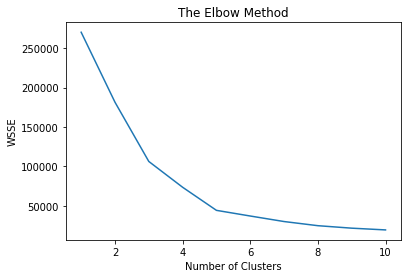

In [18]:
from sklearn.cluster import KMeans
wsse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
plt.show()

In [22]:
kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred=kmeans.fit_predict(X)
print(Y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


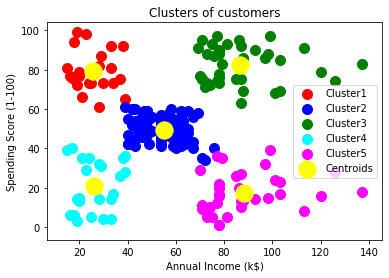

In [24]:
# Visualising the clusters
#plt.scatter(X,Y)
#X==>0th col(Annual Income)
#Y==>1st col(Spending Score)
#X[Y_pred == 0, 0]==>X[all obs which have been assigned to cluster 0,Annual income variable]
#X[Y_pred == 2, 1]==>X[all obs which have been assigned to cluster 2,Spending score variable]
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
df["Cluster"]=Y_pred

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [31]:
df["Cluster"]=df.Cluster.map({0:"Careless",1:"Standard",2:"Target",3:"Sensible",4:"Careful"})

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN
